# Capital Asset Pricing Model

Portfolio (a set of weighted securities) Returns at time $ t $:
## $r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$

Market Weights:
## $ w_i = \frac{MarketCap_i}{\sum_{j}^{n}{MarketCap_j}} $

CAPM of a portfolio:
## $ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$

where $ r_m $ is the return of an entire market.

In [23]:
import numpy as np
import pandas as pd
from scipy import stats
import pandas_datareader as web
import matplotlib.pyplot as plt

## Comparison between Apple and SPY

In [5]:
plt.rcParams['font.size'] = 20

In [6]:
spy_etf = web.DataReader('SPY', 'yahoo')

In [7]:
spy_etf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,96.833946,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,97.090271,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,97.158661,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,97.568771,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,97.893463,126402800


In [9]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2018-01-12')

In [10]:
aapl = web.DataReader('AAPL', 'yahoo', start, end)

### Close Price

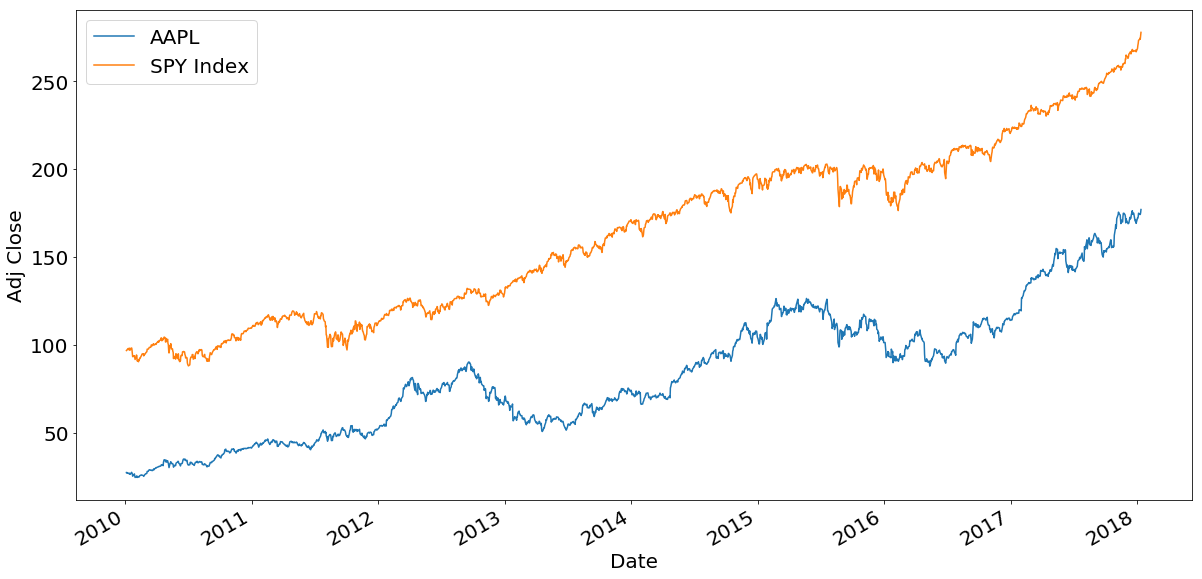

In [14]:
aapl['Adj Close'].plot(
    figsize=(20, 10),
    label='AAPL'
)

spy_etf['Adj Close'].plot(
    label='SPY Index'
)

plt.ylabel('Adj Close')
plt.legend();

### Cumulative Return

In [13]:
aapl['Cumulative Return'] = aapl['Adj Close'] / aapl['Adj Close'][0]
spy_etf['Cumulative Return'] = spy_etf['Adj Close'] / spy_etf['Adj Close'][0]

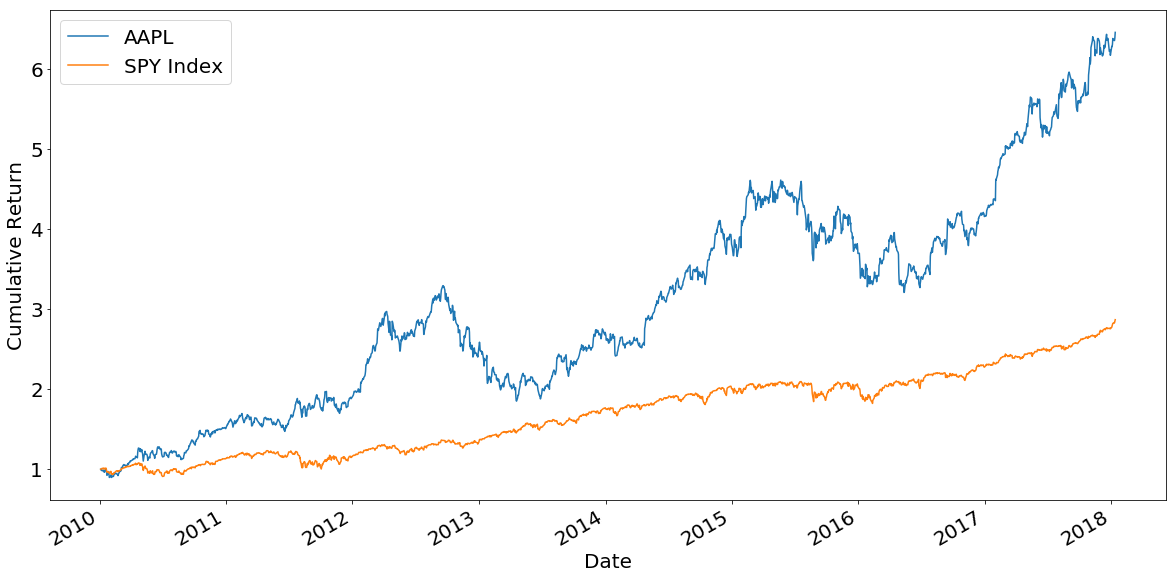

In [15]:
aapl['Cumulative Return'].plot(
    figsize=(20, 10),
    label='AAPL'
)

spy_etf['Cumulative Return'].plot(label='SPY Index')

plt.ylabel('Cumulative Return')
plt.legend();

### Daily Return

In [16]:
aapl['Daily Return'] = aapl['Adj Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Adj Close'].pct_change(1)

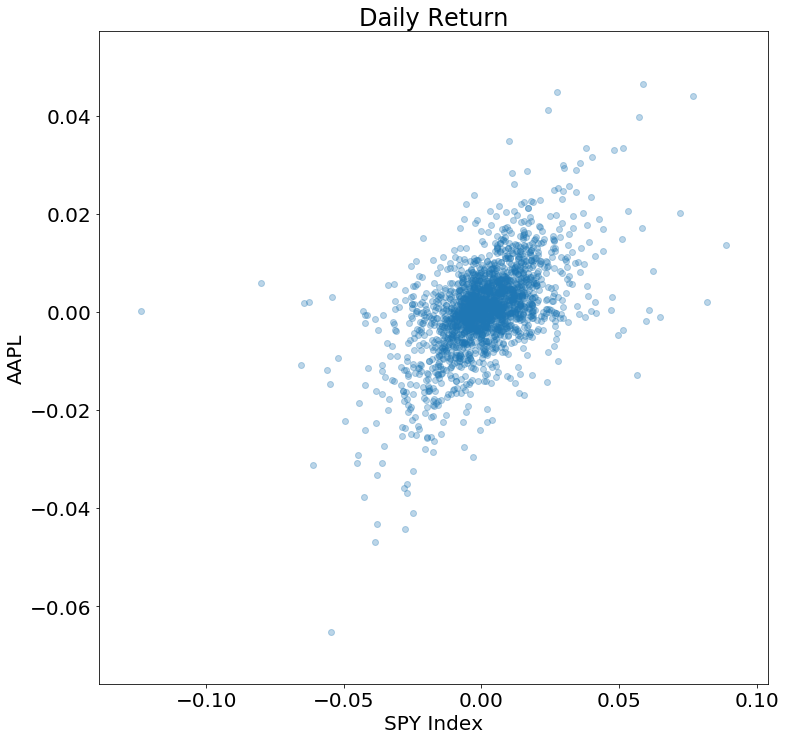

In [18]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(aapl['Daily Return'], spy_etf['Daily Return'], alpha=0.3)
plt.ylabel('AAPL')
plt.xlabel('SPY Index')
plt.title('Daily Return');

In [21]:
beta, alpha, r_value, p_value, std_err = stats.linregress(
    aapl['Daily Return'][1:],
    spy_etf['Daily Return'][1:]
)

In [22]:
print('beta: ', beta)
print('alpha: ', alpha)
print('r_value: ', r_value)
print('p_value: ', p_value)
print('std_err: ', std_err)

beta:  0.32045374804
alpha:  0.00022768952286
r_value:  0.553889189175
p_value:  7.18456711356e-163
std_err:  0.0107202695127


## What if a stock was completely related to S&P500?

In [24]:
noise = np.random.normal(0, 0.001, len(spy_etf['Daily Return'][1:]))

In [25]:
some_stock = spy_etf['Daily Return'][1:] + noise

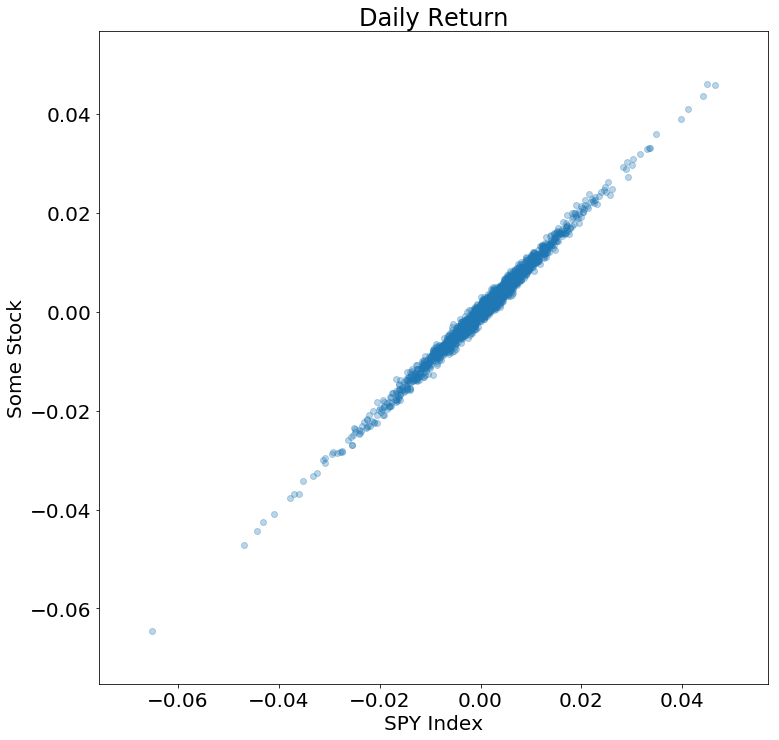

In [28]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(spy_etf['Daily Return'][1:], some_stock, alpha=0.3)
plt.ylabel('Some Stock')
plt.xlabel('SPY Index')
plt.title('Daily Return');

In [29]:
beta, alpha, r_value, p_value, std_err = stats.linregress(
    spy_etf['Daily Return'][1:],
    some_stock
)

print('beta: ', beta)
print('alpha: ', alpha)
print('r_value: ', r_value)
print('p_value: ', p_value)
print('std_err: ', std_err)

beta:  1.00005908786
alpha:  -7.50752662732e-07
r_value:  0.994358900669
p_value:  0.0
std_err:  0.0023740937635
